# Introducttion 

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax (rate per 10,000)
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000

# Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Loading the data

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_data = pd.read_csv("housing.csv", names = column_names, header=None, delimiter=r"\s+")
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
raw_data.shape

(506, 14)

In [5]:
raw_data.dtypes.value_counts()

float64    12
int64       2
dtype: int64

# Data Exploration

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
raw_data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

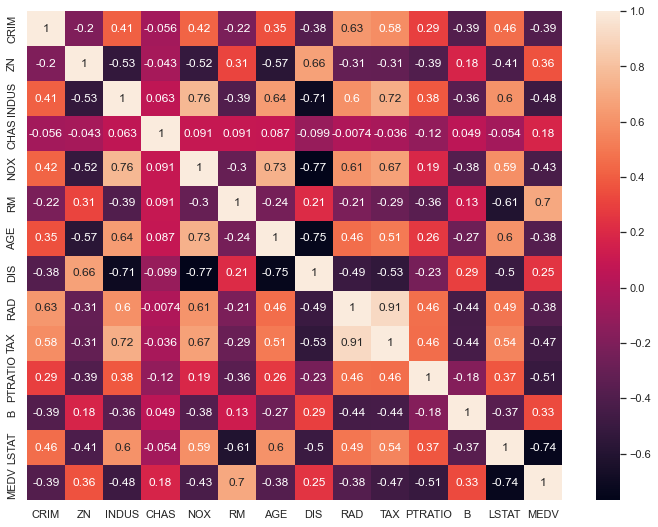

In [8]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(raw_data.corr(), annot=True)

# 'MEDV' correlation matrix (zoomed heatmap style)


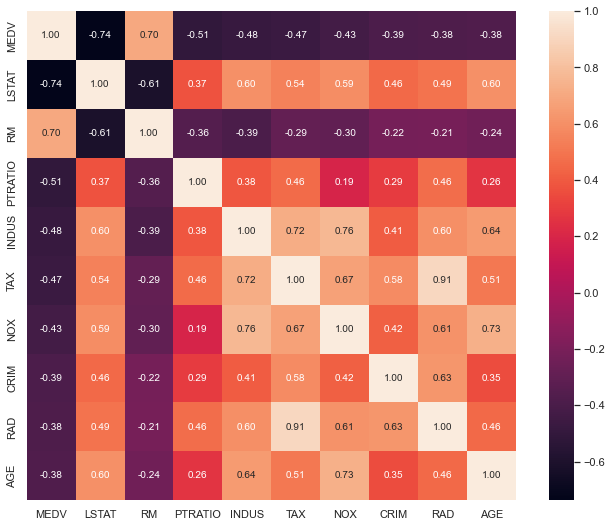

In [9]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
corrmat = raw_data.corr().abs()
cols = corrmat.nlargest(10, 'MEDV')['MEDV'].index
cm = np.corrcoef(raw_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

# Data Pre-processing Engineering

## 1.Deling with null values

From the info function, It seems that there is not any missing values

let's check it ??

In [10]:
raw_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

It's true. There is not any missing valeus..

## 2.Deling with dublicated values

In [11]:
raw_data.duplicated().sum()

0

Also, there is not any duplicted valeus..

## 3.Deling with outliers

In [12]:
raw_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


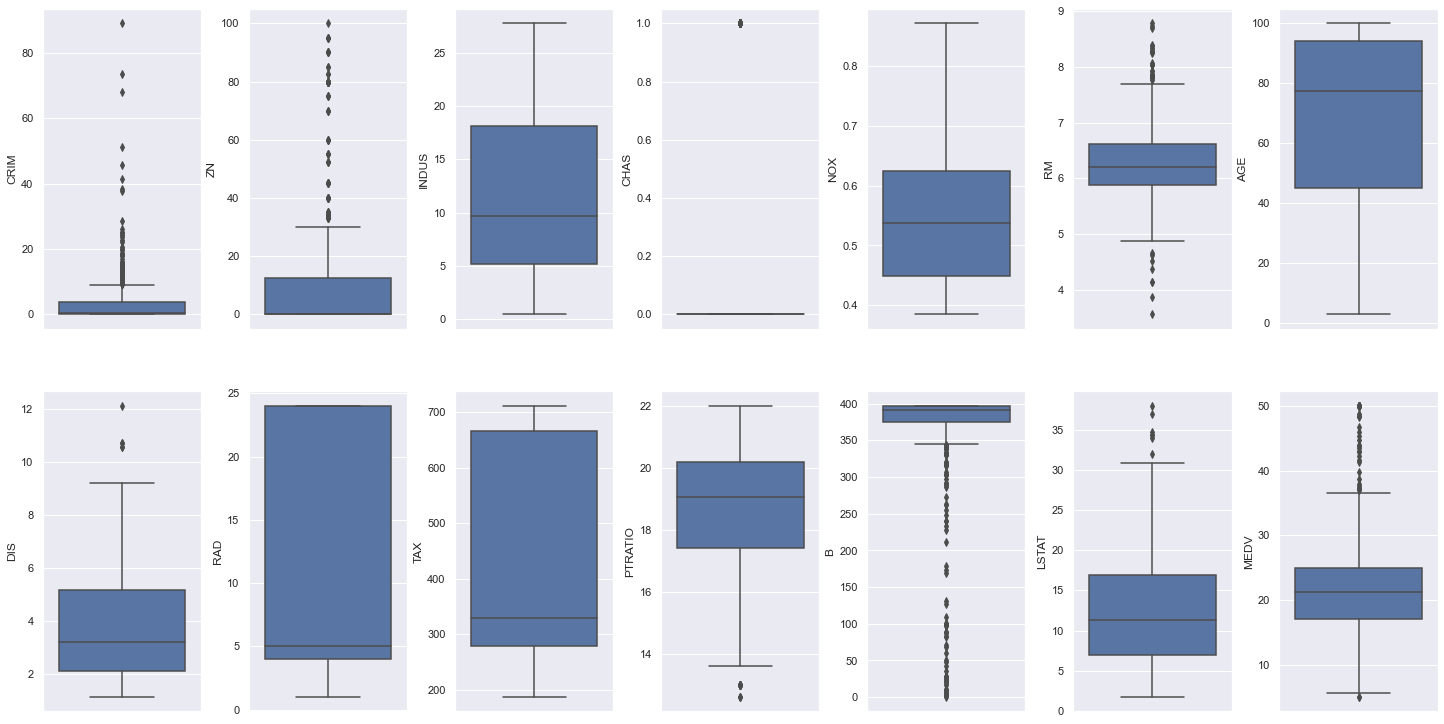

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in raw_data.items():
    sns.boxplot(y=k, data=raw_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.



<AxesSubplot:xlabel='CRIM', ylabel='Count'>

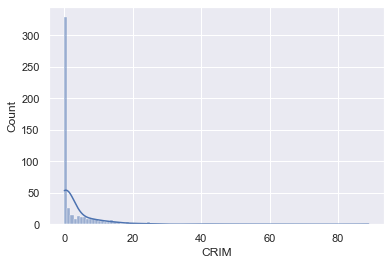

In [14]:
sns.histplot(raw_data['CRIM'], kde=True)

<AxesSubplot:xlabel='ZN', ylabel='Count'>

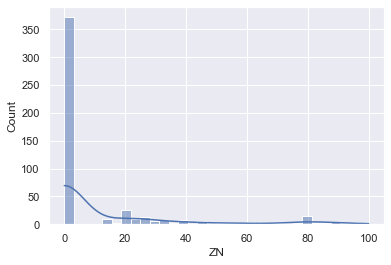

In [15]:
sns.histplot(raw_data['ZN'], kde=True)

<AxesSubplot:xlabel='RM', ylabel='Count'>

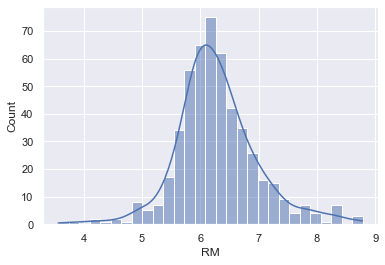

In [16]:
sns.histplot(raw_data['RM'], kde=True)

<AxesSubplot:xlabel='B', ylabel='Count'>

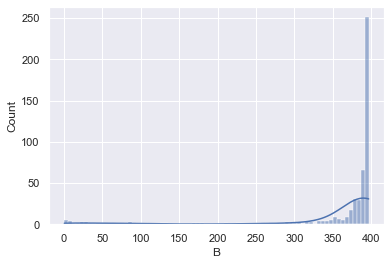

In [17]:
sns.histplot(raw_data['B'], kde=True)

In [18]:
    for k, v in raw_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(raw_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [19]:
Q1 = raw_data['CRIM'].quantile(0.25)
Q3 = raw_data['CRIM'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * (IQR)
upper = Q3 + 1.5 * (IQR)


In [20]:
data_1 = raw_data[raw_data["CRIM"] <= upper]


<AxesSubplot:xlabel='CRIM', ylabel='Count'>

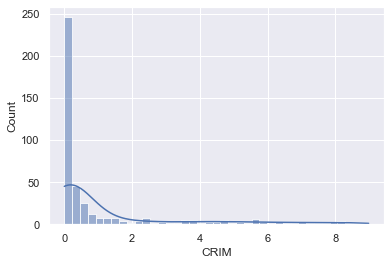

In [21]:
sns.histplot(data_1['CRIM'], kde=True)

In [22]:
Q1 = raw_data['ZN'].quantile(0.25)
Q3 = raw_data['ZN'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * (IQR)
upper = Q3 + 1.5 * (IQR)


In [23]:
#data_2 = data_1[(data_1["ZN"] <= upper) & (data_1["ZN"] >= upper) ]

In [24]:
data_2 = data_1[(data_1["ZN"] <= upper)]

<AxesSubplot:xlabel='ZN', ylabel='Count'>

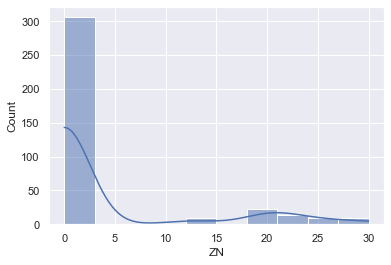

In [25]:
sns.histplot(data_2['ZN'], kde=True)

In [26]:
Q1 = raw_data['MEDV'].quantile(0.25)
Q3 = raw_data['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * (IQR)
upper = Q3 + 1.5 * (IQR)

In [27]:
data_3 = data_2[(data_2["MEDV"] <= upper) & (data_2["MEDV"] >= lower) ]

<AxesSubplot:>

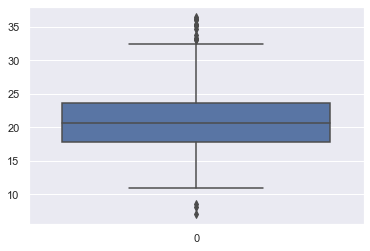

In [28]:
sns.boxplot( data = data_3['MEDV'])

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [29]:
columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', 'MEDV']
data_cleaned = data_3[columns].reset_index(drop=True)

In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    343 non-null    float64
 1   INDUS    343 non-null    float64
 2   NOX      343 non-null    float64
 3   PTRATIO  343 non-null    float64
 4   RM       343 non-null    float64
 5   TAX      343 non-null    float64
 6   DIS      343 non-null    float64
 7   AGE      343 non-null    float64
 8   MEDV     343 non-null    float64
dtypes: float64(9)
memory usage: 24.2 KB


# Checking relationship between the Featuress and Target

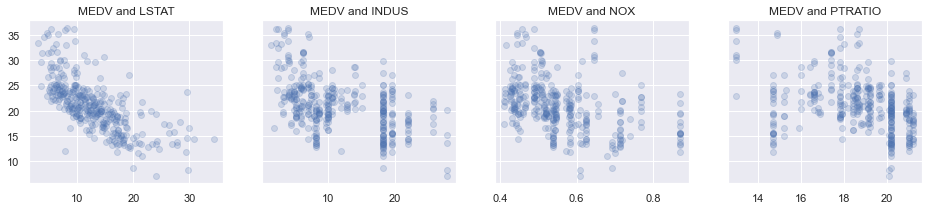

In [31]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(16,3))
ax1.scatter(data_cleaned['LSTAT'],data_cleaned['MEDV'], alpha=0.2)
ax1.set_title('MEDV and LSTAT')
ax2.scatter(data_cleaned['INDUS'],data_cleaned['MEDV'], alpha=0.2)
ax2.set_title('MEDV and INDUS')
ax3.scatter(data_cleaned['NOX'],data_cleaned['MEDV'], alpha=0.2)
ax3.set_title('MEDV and NOX')
ax4.scatter(data_cleaned['PTRATIO'],data_cleaned['MEDV'], alpha=0.2)
ax4.set_title('MEDV and PTRATIO')
plt.show()




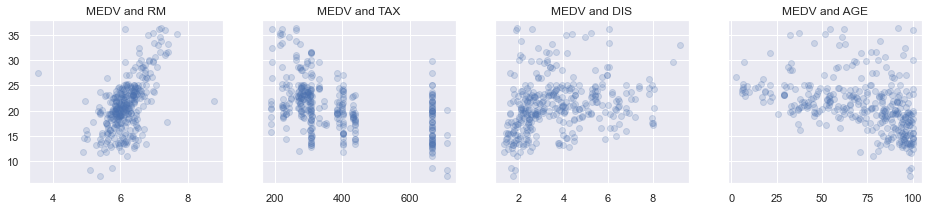

In [32]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(16,3))
ax1.scatter(data_cleaned['RM'],data_cleaned['MEDV'], alpha=0.2)
ax1.set_title('MEDV and RM')
ax2.scatter(data_cleaned['TAX'],data_cleaned['MEDV'], alpha=0.2)
ax2.set_title('MEDV and TAX')
ax3.scatter(data_cleaned['DIS'],data_cleaned['MEDV'], alpha=0.2)
ax3.set_title('MEDV and DIS')
ax4.scatter(data_cleaned['AGE'],data_cleaned['MEDV'], alpha=0.2)
ax4.set_title('MEDV and AGE')
plt.show()

In [33]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
for i, k in enumerate(column_sels):
    print(i)
    print(k)

0
LSTAT
1
INDUS
2
NOX
3
PTRATIO
4
RM
5
TAX
6
DIS
7
AGE


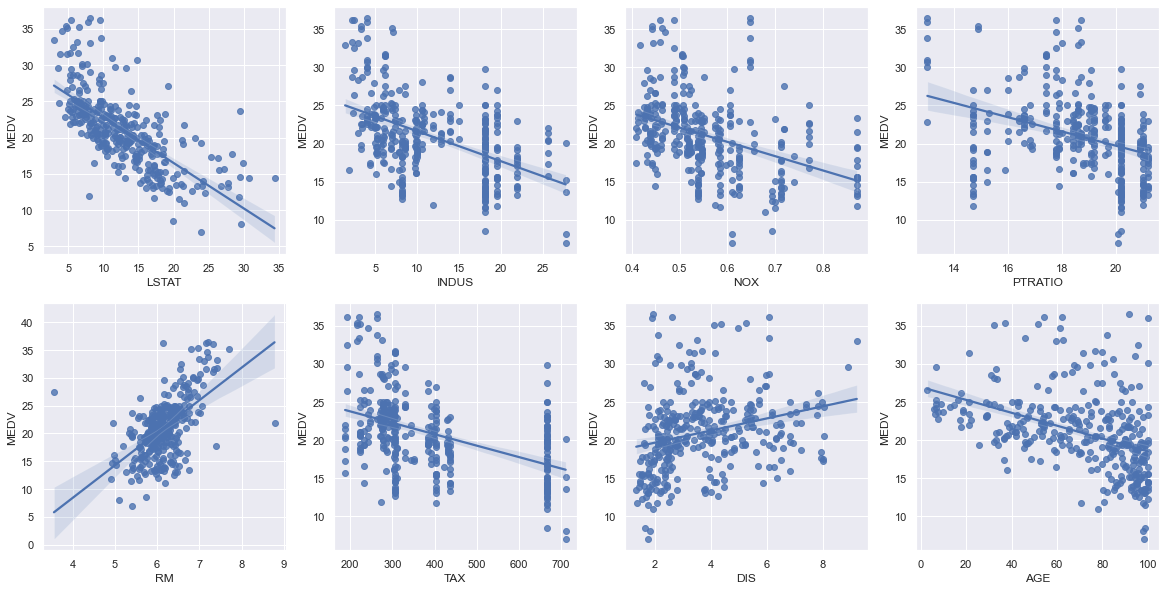

In [34]:

features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data_cleaned.drop(['MEDV'], axis=1)
y = data_cleaned['MEDV']
fetures_df = data_cleaned[features]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=fetures_df[k], ax=axs[i])


# Checking the Normality of the Target

In [35]:
from scipy.stats.mstats import normaltest
normaltest(data_cleaned['MEDV'].values)

NormaltestResult(statistic=17.24563281832857, pvalue=0.00017995271983433132)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

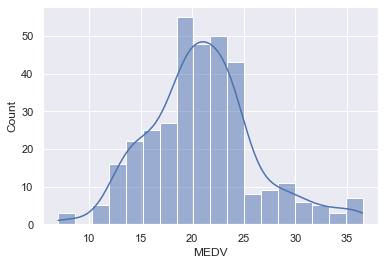

In [36]:
sns.histplot(data_cleaned['MEDV'], kde=True)

# Relaxing the Target (Making the target with a normal distribution)


## Testing (Log)


<AxesSubplot:xlabel='MEDV', ylabel='Count'>

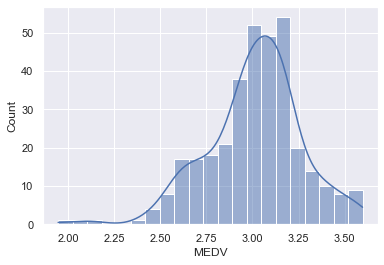

In [37]:
log_MEDV = np.log(data_cleaned['MEDV'])
sns.histplot(log_MEDV, kde=True)


In [38]:
normaltest(log_MEDV.values)

NormaltestResult(statistic=21.0957445599491, pvalue=2.6249272595071003e-05)

## Testing (square)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

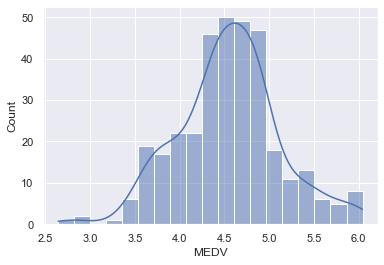

In [39]:
sqrt_price= np.sqrt(data_cleaned['MEDV'])
sns.histplot(sqrt_price, kde=True)

In [40]:
normaltest(sqrt_price.values)

NormaltestResult(statistic=3.0086303858226406, pvalue=0.2221693849191586)

It seems that the target valeus without any relaxing has the heighest p-Value

# Creating the Model


## Decleare the Inputs and Target


In [41]:
x = data_cleaned.drop(['MEDV'], axis=1)
y = data_cleaned['MEDV']

## Features Scaling


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

###  Checking relationship between the Featuress after scaling and Target

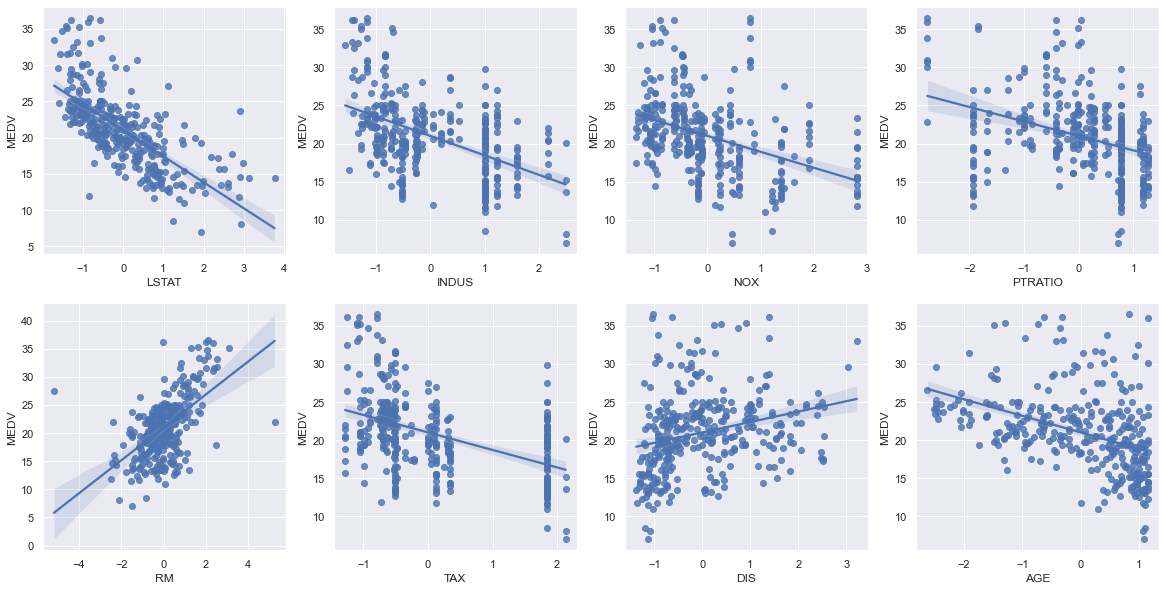

In [43]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

fetures_df = pd.DataFrame(data = x_scaled, columns = column_sels)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=fetures_df[k], ax=axs[i])

# Model Representation

## Data Splitting


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)

## Model Training


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [47]:
y_hat = reg.predict(x_test)


## First Check(The Linearity Rlationship)

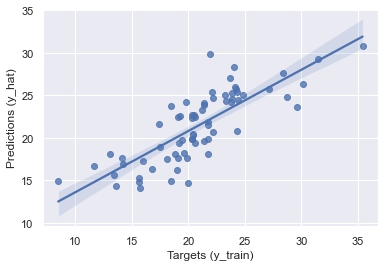

In [48]:
sns.regplot(y = y_hat, x = y_test)
# plt.scatter(y_test, y_hat )
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

## Second Check(The Residual Distribution)


Text(0.5, 1.0, 'Residuals Distribution')

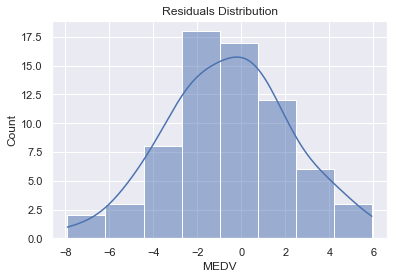

In [49]:
sns.histplot(y_test-y_hat, kde=True)
plt.title("Residuals Distribution")
#even the residuals are piling at zero as ecpected, some are highly negative as shown by left skew
# we will deal with that later to improve the model

## Third Check(The R-Squared)


In [50]:
reg.score(x_train, y_train)

0.6709593602517713

In [51]:
reg.score(x_test, y_test)

0.620012826525292

## Model Cofficent and Weights

In [52]:
reg.intercept_

21.121656285535973

In [53]:
reg.coef_

array([-1.9624292 , -0.48813572, -0.91028813, -1.41910122,  1.62455908,
       -0.34618367, -1.50877496, -0.85760949])

In [54]:
y_test = y_test.reset_index(drop=True)
df_pf = pd.DataFrame(y_hat, columns=['Prediction'])
df_pf["Target"] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf



,Prediction,Target,Residual,Difference%
0,20.428105,20.4,-0.028105,0.137769
1,16.882110,14.2,-2.682110,18.888100
2,25.435640,22.1,-3.335640,15.093395
3,18.974486,17.5,-1.474486,8.425636
4,15.661460,13.4,-2.261460,16.876569
...,...,...,...,...
64,19.689334,19.4,-0.289334,1.491410
65,17.517704,18.1,0.582296,3.217105
66,25.768610,27.1,1.331390,4.912878
67,17.268761,16.0,-1.268761,7.929756


In [55]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
0,20.43,20.40,-0.03,0.14
23,20.35,20.40,0.05,0.26
63,24.48,24.40,-0.08,0.33
60,21.88,21.70,-0.18,0.84
15,25.01,24.80,-0.21,0.84
...,...,...,...,...
49,23.72,18.50,-5.22,28.24
51,29.81,21.90,-7.91,36.12
24,18.12,13.10,-5.02,38.33
12,16.71,11.70,-5.01,42.79


# Model Evaluation


In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat)

2.252177306539591

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

8.097758921036055

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat, multioutput= 'uniform_average')

0.620012826525292

# Polynomial Regression - 2nd degree

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(x_train)
X_poly_test = poly_reg.fit_transform(x_test)
poly_reg.fit(X_poly, y_train)

PolynomialFeatures()

In [71]:
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly_train, y_train)
y_pred_p = regressor_poly2.predict(X_poly_test)

In [72]:
regressor_poly2.score(X_poly_train, y_train)

0.8515720385954739

In [73]:
regressor_poly2.score(X_poly_test, y_test)

0.482463417532666

In [74]:
r2_score(y_test, y_pred, multioutput= 'uniform_average')

0.7034429279153118

# SVR

In [61]:
from sklearn.svm import SVR

In [62]:
svr_model = SVR(kernel = 'rbf', gamma = 'scale')
svr_model.fit(x_train, y_train)

SVR()

In [63]:
svr_model.score(x_train, y_train)

0.7321214781738211

In [64]:
svr_model.score(x_test, y_test)

0.7034429279153118

In [65]:
y_pred = svr_model.predict(x_test)

In [66]:
mean_absolute_error(y_pred, y_hat)

1.4136520287180512

In [67]:
mean_squared_error(y_pred, y_hat)

3.3904064130757297

In [68]:
r2_score(y_test, y_pred, multioutput= 'uniform_average')

0.7034429279153118